In [1]:
# Run this in Python once, it should take effect permanently
from notebook.services.config import ConfigManager
c = ConfigManager()

c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data_values = pd.read_csv("data/training_set_values.csv")
data_labels = pd.read_csv("data/training_set_labels.csv")

test_set_values = pd.read_csv("data/test_set_values.csv")

In [4]:
user_id = ["id"]
X_cols = ['amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group']
Y_col = ["status_group"]

In [5]:
Users = data_values[user_id]
X = data_values[X_cols]
Y = data_labels[Y_col]

X_test = test_set_values[X_cols]
X_test_users = test_set_values[user_id]

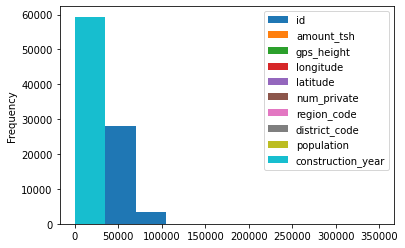

In [6]:
# data distribution
ax = data_values.plot.hist()

In [7]:
status_group_map = {"status_group": {"functional": 0, "functional needs repair": 1,"non functional": 2}}
Y = Y.replace(status_group_map)
# Y

In [8]:
df = pd.concat([ Users,Y, X], axis=1)
# X_test = pd.concat([X_test_users, X_test], axis=1)
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,0,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,2,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,0,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


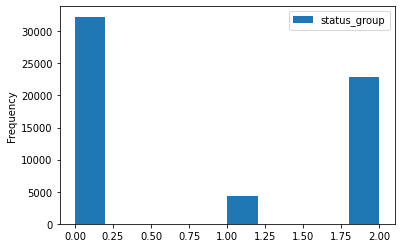

In [9]:
# status_group data distribution
ax = df[['status_group']].plot.hist()

## Handling Missing Data

In [10]:
# df.dtypes

In [11]:
columns_with_nan_train = df.columns[df.isna().any()].tolist()
print("Columns with Missing Values in Train Dataset : ")
columns_with_nan_train

Columns with Missing Values in Train Dataset : 


['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

In [12]:
missing_df = df[columns_with_nan_train]
missing_df

,funder,installer,subvillage,public_meeting,scheme_management,scheme_name,permit
0,Roman,Roman,Mnyusi B,True,VWC,Roman,False
1,Grumeti,GRUMETI,Nyamara,NaN,Other,NaN,True
2,Lottery Club,World vision,Majengo,True,VWC,Nyumba ya mungu pipe scheme,True
3,Unicef,UNICEF,Mahakamani,True,VWC,NaN,True
4,Action In A,Artisan,Kyanyamisa,True,NaN,NaN,True
...,...,...,...,...,...,...,...
59395,Germany Republi,CES,Kiduruni,True,Water Board,Losaa Kia water supply,True
59396,Cefa-njombe,Cefa,Igumbilo,True,VWC,Ikondo electrical water sch,True
59397,NaN,NaN,Madungulu,True,VWC,NaN,False
59398,Malec,Musa,Mwinyi,True,VWC,NaN,True


In [13]:
missing_df.isna().sum()

funder                3635
installer             3655
subvillage             371
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
dtype: int64

In [14]:
missing_df.dtypes

funder               object
installer            object
subvillage           object
public_meeting       object
scheme_management    object
scheme_name          object
permit               object
dtype: object

In [15]:
# Drop the column 'scheme_name' since it has 28166 missing data cant impute such big number
# and scheme_name is not much important for prediction

df_dropped = df.drop('scheme_name', axis = 1)
test_df_dropped = X_test.drop('scheme_name', axis = 1)

In [16]:
# Drop the rows with missing data or nan
# df_dropped = df_dropped.dropna()

#Drop cols with missing values
cols_with_missing = ["funder","installer","subvillage","public_meeting","scheme_management","permit"]
df_dropped = df_dropped.drop(cols_with_missing, axis=1)
test_df_dropped = test_df_dropped.drop(cols_with_missing, axis=1)

In [17]:
# df_dropped.isna().sum()

In [18]:
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,0,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,2,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,0,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [19]:
### Impute values

def impute_missing_data_using_mean(dataframe, columns):

    for col in columns:
        if (dataframe[col].dtype != np.object ):
            dataframe[col] = dataframe[col].fillna((dataframe[col].mean()))
            print("Imputed with mean: ", col)
        print("Not Imputed with mean: ", col, dataframe[col].dtype)

    return dataframe

# train_data = impute_missing_data_using_mean(df,columns_with_nan_train)


In [20]:
df = df_dropped
X_test = test_df_dropped
# df
# X_test

In [21]:
# df.isna().sum()

## Normalize

In [22]:
df.dtypes

id                         int64
status_group               int64
amount_tsh               float64
date_recorded             object
gps_height                 int64
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
recorded_by               object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_typ

<AxesSubplot:>

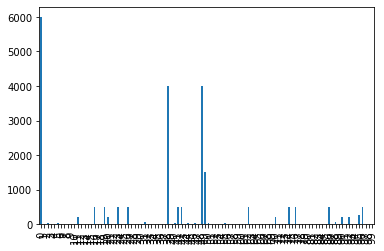

In [23]:
df.head(100)['amount_tsh'].plot(kind = 'bar')

In [24]:
df_ = df[['amount_tsh']].copy()
X_test_ = X_test[['amount_tsh']].copy()
  
# apply normalization techniques on Column amount_tsh
column = 'amount_tsh'
df[column] = (df_[column] - df_[column].min()) / (df_[column].max() - df_[column].min())
X_test[column] = (X_test_[column] - X_test_[column].min()) / (X_test_[column].max() - X_test_[column].min())

# df[column] = df_max_scaled[column] /df_max_scaled[column].abs().max()
# X_test[column] = X_test_max_scaled[column] /X_test_max_scaled[column].abs().max()
  
# view normalized data
# df['amount_tsh'] = df_max_scaled['amount_tsh']
# X_test['amount_tsh'] = X_test_max_scaled['amount_tsh']
df

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,0,0.017143,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0,0.000000,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,0,0.000071,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,2,0.000000,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0,0.000000,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,0.000029,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,0,0.013429,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0,0.000000,2011-04-11,0,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0,0.000000,2011-03-08,0,35.861315,-6.378573,Mshoro,0,Rufiji,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [25]:
# df.head(10)['amount_tsh'].plot(kind = 'bar')

## Making New Features

### New Distance feature using lat and long

In [26]:
import folium
mapit = folium.Map(location=[ df.iloc[0]['latitude'], df.iloc[0]['longitude'] ], zoom_start=10 )
for index, row in df.head(250).iterrows():
#     print(row['latitude'])
    folium.Marker( location=[ row['latitude'], row['longitude'] ], fill_color='#43d9de', radius=8 ).add_to( mapit )

mapit

In [27]:
# Getting distances from lat-long

from geopy.distance import geodesic

fix_location = (-6.9895371,28.9141675)
df["distance"] = df.apply(lambda df:geodesic((df["latitude"], df["longitude"]), fix_location), axis=1)
X_test["distance"] = X_test.apply(lambda X_test:geodesic((X_test["latitude"], X_test["longitude"]), fix_location), axis=1)

In [28]:
# converting distances to float

df['distance'] = df['distance'].astype(str).str[:-3].astype(float)
X_test['distance'] = X_test['distance'].astype(str).str[:-3].astype(float)
# df["distance"]

In [29]:
df

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,distance
0,69572,0,0.017143,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,735.197145
1,8776,0,0.000000,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,835.760295
2,34310,0,0.000071,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1009.785686
3,67743,2,0.000000,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1148.497687
4,19728,0,0.000000,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,621.775293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,0.000029,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1004.112720
59396,27263,0,0.013429,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,735.331986
59397,37057,0,0.000000,2011-04-11,0,34.017087,-8.750434,Mashine,0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,595.459319
59398,31282,0,0.000000,2011-03-08,0,35.861315,-6.378573,Mshoro,0,Rufiji,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,771.087144


In [30]:
# df = df.drop("longitude",axis=1)
# df = df.drop("latitude",axis=1)

# X_test = X_test.drop("longitude",axis=1)
# X_test = X_test.drop("latitude",axis=1)

In [31]:
X_test

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,distance
0,0.0000,2013-02-04,1996,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Manyara,21,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,777.235977
1,0.0000,2013-02-04,1569,36.656709,-3.309214,Kimnyak,0,Pangani,Arusha,2,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,949.888554
2,0.0000,2013-02-01,1567,34.767863,-5.004344,Puma Secondary,0,Internal,Singida,13,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,684.227159
3,0.0000,2013-01-22,267,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Lindi,80,...,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,1042.647984
4,0.0025,2013-03-27,1260,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Ruvuma,10,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,800.310802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0000,2011-02-24,34,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Pwani,6,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1099.547772
14846,0.0050,2011-03-21,0,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Tanga,4,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,962.104188
14847,0.0000,2013-03-04,1476,34.739804,-4.585587,Bwawani,0,Internal,Singida,13,...,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,697.795866
14848,0.0000,2013-02-18,998,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Ruvuma,10,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,819.888931


## Encoding

### Target Encoding 

In [32]:
import category_encoders as ce
encoder=ce.TargetEncoder(cols='region_code') 
df_region_code = encoder.fit_transform(df['region_code'],df['gps_height'])

C:\Users\chama\AppData\Local\Programs\Python\Python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [33]:
df['region_code'] = df_region_code['region_code']

In [34]:
# columns with data type `object` needs to be encoded

obj_df = df.select_dtypes(include=['object']).copy()
test_obj_df = X_test.select_dtypes(include=['object']).copy()
obj_df
# test_obj_df

,date_recorded,wpt_name,basin,region,lga,ward,recorded_by,extraction_type,extraction_type_group,extraction_type_class,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,none,Lake Nyasa,Iringa,Ludewa,Mundindi,GeoData Consultants Ltd,gravity,gravity,gravity,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Zahanati,Lake Victoria,Mara,Serengeti,Natta,GeoData Consultants Ltd,gravity,gravity,gravity,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Kwa Mahundi,Pangani,Manyara,Simanjiro,Ngorika,GeoData Consultants Ltd,gravity,gravity,gravity,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,Nanyumbu,Nanyumbu,GeoData Consultants Ltd,submersible,submersible,submersible,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Shuleni,Lake Victoria,Kagera,Karagwe,Nyakasimbi,GeoData Consultants Ltd,gravity,gravity,gravity,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Area Three Namba 27,Pangani,Kilimanjaro,Hai,Masama Magharibi,GeoData Consultants Ltd,gravity,gravity,gravity,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,2011-05-07,Kwa Yahona Kuvala,Rufiji,Iringa,Njombe,Ikondo,GeoData Consultants Ltd,gravity,gravity,gravity,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,2011-04-11,Mashine,Rufiji,Mbeya,Mbarali,Chimala,GeoData Consultants Ltd,swn 80,swn 80,handpump,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,2011-03-08,Mshoro,Rufiji,Dodoma,Chamwino,Mvumi Makulu,GeoData Consultants Ltd,nira/tanira,nira/tanira,handpump,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [35]:
obj_df.nunique()
# test_obj_df.nunique()

date_recorded              356
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
recorded_by                  1
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
dtype: int64

In [36]:

obj_df.columns

Index(['date_recorded', 'wpt_name', 'basin', 'region', 'lga', 'ward',
       'recorded_by', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [37]:
# Remove 'recorded_by' feature : since same for all
same_val_cols = ["recorded_by","payment","quantity"]
df = df.drop(same_val_cols, axis = 1)
X_test = X_test.drop(same_val_cols, axis = 1)

obj_df = df.select_dtypes(include=['object']).copy()
test_obj_df = X_test.select_dtypes(include=['object']).copy()

In [38]:
# obj_df[["payment","payment_type"]]

### One Hot Encoding

In [39]:
one_hot_encode_features = [ 'basin',
       'extraction_type_class', 'management_group',
       'payment_type', 'water_quality', 'quality_group',
       'quantity_group', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group']

df = pd.concat([df,pd.get_dummies(df[one_hot_encode_features])],axis=1)
df.drop(one_hot_encode_features,axis=1, inplace=True)

X_test = pd.concat([X_test,pd.get_dummies(X_test[one_hot_encode_features])],axis=1)
X_test.drop(one_hot_encode_features,axis=1, inplace=True)

# df_one_hot_encoded = pd.get_dummies(df[one_hot_encode_features],drop_first=True)
# X_test_one_hot_encoded = pd.get_dummies(X_test[one_hot_encode_features],drop_first=True)

obj_df = df.select_dtypes(include=['object']).copy()
test_obj_df = X_test.select_dtypes(include=['object']).copy()


In [40]:
# obj_df

### Label Encoding

In [41]:
df

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,region,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,0,0.017143,2011-03-14,1390,34.938093,-9.856322,none,0,Iringa,...,0,0,0,0,0,1,0,0,0,0
1,8776,0,0.000000,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Mara,...,0,0,0,0,0,1,0,0,0,0
2,34310,0,0.000071,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Manyara,...,0,0,0,0,0,1,0,0,0,0
3,67743,2,0.000000,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Mtwara,...,0,0,0,0,0,1,0,0,0,0
4,19728,0,0.000000,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Kagera,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,0.000029,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,0,Kilimanjaro,...,0,0,0,0,0,1,0,0,0,0
59396,27263,0,0.013429,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,0,Iringa,...,0,0,0,0,0,1,0,0,0,0
59397,37057,0,0.000000,2011-04-11,0,34.017087,-8.750434,Mashine,0,Mbeya,...,0,1,0,0,0,0,0,1,0,0
59398,31282,0,0.000000,2011-03-08,0,35.861315,-6.378573,Mshoro,0,Dodoma,...,0,1,0,0,0,0,0,1,0,0


In [42]:
from sklearn.preprocessing import LabelEncoder

obj_df = obj_df.apply(LabelEncoder().fit_transform)
test_obj_df = test_obj_df.apply(LabelEncoder().fit_transform)


In [43]:
obj_df.dtypes

date_recorded            int32
wpt_name                 int32
region                   int32
lga                      int32
ward                     int32
extraction_type          int32
extraction_type_group    int32
management               int32
source                   int32
dtype: object

In [44]:
# encoded_cols = [ 'date_recorded', 'funder', 'installer', 'wpt_name',
#        'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting',
#        'recorded_by', 'scheme_management', 'permit', 'extraction_type',
#        'extraction_type_group', 'extraction_type_class', 'management',
#        'management_group', 'payment', 'payment_type', 'water_quality',
#        'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
#        'source_class', 'waterpoint_type', 'waterpoint_type_group']
encoded_cols = obj_df.columns
df[encoded_cols] = obj_df[encoded_cols] 
X_test[encoded_cols] = test_obj_df[encoded_cols]

In [45]:
df

,id,status_group,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,region,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,69572,0,0.017143,47,1390,34.938093,-9.856322,37399,0,3,...,0,0,0,0,0,1,0,0,0,0
1,8776,0,0.000000,309,1399,34.698766,-2.147466,37195,0,9,...,0,0,0,0,0,1,0,0,0,0
2,34310,0,0.000071,300,686,37.460664,-3.821329,14572,0,8,...,0,0,0,0,0,1,0,0,0,0
3,67743,2,0.000000,272,263,38.486161,-11.155298,37285,0,12,...,0,0,0,0,0,1,0,0,0,0
4,19728,0,0.000000,104,0,31.130847,-1.825359,35529,0,4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,0,0.000029,338,1210,37.169807,-3.253847,513,0,6,...,0,0,0,0,0,1,0,0,0,0
59396,27263,0,0.013429,90,1212,35.249991,-9.070629,24074,0,3,...,0,0,0,0,0,1,0,0,0,0
59397,37057,0,0.000000,75,0,34.017087,-8.750434,27926,0,10,...,0,1,0,0,0,0,0,1,0,0
59398,31282,0,0.000000,41,0,35.861315,-6.378573,29693,0,2,...,0,1,0,0,0,0,0,1,0,0


In [46]:
X_test

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,region,region_code,district_code,...,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
0,0.0000,255,1996,35.290799,-4.059696,656,0,8,21,3,...,0,0,0,1,0,0,0,0,0,1
1,0.0000,255,1569,36.656709,-3.309214,1780,0,0,2,2,...,0,0,0,0,0,1,0,0,0,0
2,0.0000,252,1567,34.767863,-5.004344,9673,0,18,13,2,...,0,0,0,1,0,0,0,0,0,1
3,0.0000,242,267,38.058046,-9.418672,5595,0,7,80,43,...,0,0,0,1,0,0,0,0,0,1
4,0.0025,306,1260,35.006123,-10.950412,5706,0,16,10,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0000,28,34,38.852669,-6.582841,7223,0,14,6,1,...,0,0,0,0,0,1,0,0,0,0
14846,0.0050,53,0,37.451633,-5.350428,332,0,20,4,7,...,0,1,0,0,0,0,0,1,0,0
14847,0.0000,283,1476,34.739804,-4.585587,457,0,18,13,2,...,0,0,0,0,0,1,0,0,0,0
14848,0.0000,269,998,35.432732,-10.584159,3438,0,16,10,2,...,0,0,0,0,0,1,0,0,0,0


## Feature Selection

In [47]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

def SequentialBackwardFeatureSelection(df, x_cols, y_cols):
    print("\nSequential Backward Feature Selection")
    x = df[x_cols]
    y = df[y_cols]

    sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(solver='lbfgs', max_iter=2000),
                                             n_features_to_select=3,
                                             cv=10,
                                             direction='backward')
    sfs_selector.fit(x, y.values.ravel())
    features = x.columns[sfs_selector.get_support()]
    print(features)

In [48]:
cols = df.columns
x_cols = cols.drop(cols[[0, 1]])
x_cols

Index(['amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude',
       'wpt_name', 'num_private', 'region', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'construction_year', 'extraction_type',
       'extraction_type_group', 'management', 'source', 'distance',
       'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'extraction_type_class_motorpump', 'extraction_type_class_other',
       'extraction_type_class_rope pump', 'extraction_type_class_submersible',
       'extraction_type_class_wind-powered', 'management_group_commercial',
       'management_group_other', 'management_group_parastatal',
       'management_group_unknown', 'management_group_user-group',
       'payment_type_annually', 'payment_type_monthly',
 

In [49]:

# SequentialBackwardFeatureSelection(df=df, x_cols=x_cols, y_cols=["status_group"])

# Training

## Random Forest

In [50]:
from sklearn import ensemble
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, \
    f1_score, roc_auc_score, confusion_matrix

def rf_multi_class(x_train, y_train, x_test, y_test,test_set_values, test_users):
    print("\n[RF]")
    rf_clf = ensemble.RandomForestClassifier(n_estimators=200)

    rf_clf.fit(x_train, y_train.values.ravel())
    
    predictions = rf_clf.predict(test_set_values)
    status_group_map_reverse = {"status_group": {0:"functional", 1: "functional needs repair",2: "non functional"}}
    
    predictions_output = pd.DataFrame({'id': test_users["id"], 'status_group': predictions})
    predictions_output = predictions_output.replace(status_group_map_reverse)
    print(predictions_output)
    predictions_output.to_csv('my_submission_2.csv', index=False)
    print("Submission was successfully saved!\n")

    # rf_score = rf_clf.score(x_test, y_test)

    y_pred_test = rf_clf.predict(x_test)
    print(classification_report(y_test, y_pred_test))

    accuracy = accuracy_score(y_test, y_pred_test)
    print('Accuracy: %f' % accuracy)

    precision = precision_score(y_test, y_pred_test, average='micro')
#     print('Precision: %f' % precision)

    recall = recall_score(y_test, y_pred_test, average='micro')
#     print('Recall: %f' % recall)

    f1 = f1_score(y_test, y_pred_test, average='micro')
#     print('F1 score: %f' % f1)

    # auc = roc_auc_score(y_test, y_pred_test)
    # print('ROC AUC: %f' % auc)

    # matrix = confusion_matrix(y_test, y_pred_test)
    # print(matrix)
    
    

    return [accuracy, precision, recall, f1, predictions, rf_clf]

## XGBoost

In [51]:
import xgboost as xgb

def XGBoost_multi_class(x_train, y_train, x_test, y_test,test_set_values, test_users):
    print("\n[XGBoost]")
    xg_clf = xgb.XGBClassifier(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1, max_depth=5,
                               alpha=10, n_estimators=200, use_label_encoder=False, verbosity=0)
    xg_clf.fit(x_train, y_train.values.ravel())
    
    predictions = xg_clf.predict(test_set_values)
    status_group_map_reverse = {"status_group": {0:"functional", 1: "functional needs repair",2: "non functional"}}
    
    predictions_output = pd.DataFrame({'id': test_users["id"], 'status_group': predictions})
    predictions_output = predictions_output.replace(status_group_map_reverse)
    print(predictions_output)
#     predictions_output.to_csv('my_submission.csv', index=False)
#     print("Submission was successfully saved!\n")

    y_pred_test = xg_clf.predict(x_test)
    # print(classification_report(y_test, y_pred_test))

    accuracy = accuracy_score(y_test, y_pred_test)
    print('Accuracy: %f' % accuracy)

    precision = precision_score(y_test, y_pred_test, average='micro')
    print('Precision: %f' % precision)

    recall = recall_score(y_test, y_pred_test, average='micro')
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, y_pred_test, average='micro')
    print('F1 score: %f' % f1)

    # auc = roc_auc_score(y_test, y_pred_test)
    # print('ROC AUC: %f' % auc)
    #
    # matrix = confusion_matrix(y_test, y_pred_test)
    # print(matrix)

    return [accuracy, precision, recall, f1]

## Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB

def nb(x_train, y_train, x_test, y_test,test_set_values, test_users):
    print("\n[Naive Bayes]")
    nb_clf = GaussianNB()
    nb_clf.fit(x_train, y_train.values.ravel())

    # nb_score = nb_clf.score(x_test, y_test)
    # print(nb_score)

    y_pred_test = nb_clf.predict(x_test)
    # print(classification_report(y_test, y_pred_test))

    accuracy = accuracy_score(y_test, y_pred_test)
    print('Accuracy: %f' % accuracy)

    return accuracy

## SVM

In [53]:
from sklearn.svm import SVC

def svm(x_train, y_train, x_test, y_test, test_set_values, test_users):
    print("\n[SVM]")
    # sv_clf = SVC(probability=True, kernal='linear')
    sv_clf = SVC(probability=True)
    sv_clf.fit(x_train, y_train.values.ravel())

    # svm_score = sv_clf.score(x_test, y_test)

    y_pred_test = sv_clf.predict(x_test)
    # print(classification_report(y_test, y_pred_test))

    accuracy = accuracy_score(y_test, y_pred_test)
    print('Accuracy: %f' % accuracy)

    precision = precision_score(y_test, y_pred_test)
    print('Precision: %f' % precision)

    recall = recall_score(y_test, y_pred_test)
    print('Recall: %f' % recall)

    f1 = f1_score(y_test, y_pred_test)
    print('F1 score: %f' % f1)

    # auc = roc_auc_score(y_test, y_pred_test)
    # print('ROC AUC: %f' % auc)
    #
    # matrix = confusion_matrix(y_test, y_pred_test)
    # print(matrix)

    return [accuracy, precision, recall, f1]

In [54]:
# df

In [55]:
df["status_group"].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

In [56]:
y = df[["status_group"]]
X = df.drop(["id","status_group"], axis=1)

In [57]:
# Drop not wanted columns
# X = X.drop(["date_recorded"],axis = 1)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.05)
print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(56430, 89) (2970, 89) (56430, 1) (2970, 1)


## Feature Importance 

In [59]:
def get_feature_importance(x_train, y_train, x_test, y_test, x_columns):
    # print("[RF - Feature Importance]")

    rf_clf = ensemble.RandomForestClassifier(n_estimators=200)
    rf_clf.fit(x_train, y_train.values.ravel())
    rf_clf.score(x_test, y_test)

    return pd.DataFrame({"Feature": x_cols,
                         "Importance": rf_clf.feature_importances_})

In [60]:
# X.columns

In [61]:
fi_dataframe = get_feature_importance(x_train=X_train, y_train=y_train, x_test=X_validation, y_test=y_validation, x_columns = X.columns)
fi_dataframe

,Feature,Importance
0,amount_tsh,0.019799
1,date_recorded,0.051663
2,gps_height,0.046748
3,longitude,0.083758
4,latitude,0.084697
...,...,...
84,waterpoint_type_group_communal standpipe,0.003677
85,waterpoint_type_group_dam,0.000014
86,waterpoint_type_group_hand pump,0.003530
87,waterpoint_type_group_improved spring,0.000913


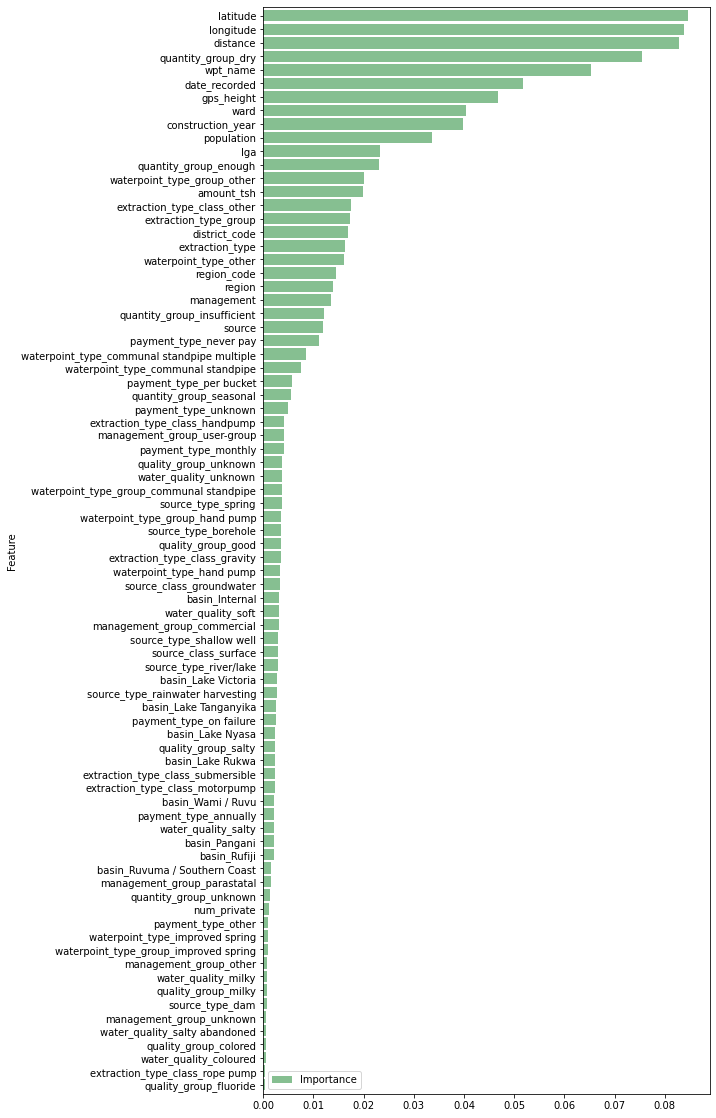

In [62]:
selected_features_df = fi_dataframe.nlargest(80,['Importance']).sort_values('Importance')

ax = selected_features_df.plot(y='Importance',x="Feature",kind = 'barh', figsize=(8, 20), color='#86bf91', zorder=2, width=0.85)

In [63]:
selected_features_df

,Feature,Importance
56,quality_group_fluoride,0.000326
32,extraction_type_class_rope pump,0.000423
47,water_quality_coloured,0.000540
55,quality_group_colored,0.000564
52,water_quality_salty abandoned,0.000601
...,...,...
5,wpt_name,0.065389
61,quantity_group_dry,0.075406
18,distance,0.082874
3,longitude,0.083758


In [64]:
# selected_features = selected_features_df["Feature"]
# X_train = X_train[selected_features]
# X_validation = X_validation[selected_features]
# X_test = X_test[selected_features]

In [65]:

accuracy, precision, recall, f1, predictions, rf_clf = rf_multi_class(x_train=X_train, y_train=y_train, x_test=X_validation, y_test=y_validation, test_set_values=X_test, test_users = X_test_users)


[RF]
          id    status_group
0      50785      functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]
Submission was successfully saved!

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1642
           1       0.62      0.36      0.46       224
           2       0.83      0.80      0.82      1104

    accuracy                           0.81      2970
   macro avg       0.76      0.68      0.71      2970
weighted avg       0.81      0.81      0.81      2970

Accuracy: 0.813805


In [66]:
partial_dependence_cols = ['wpt_name', 'quantity_group_dry', 'distance']

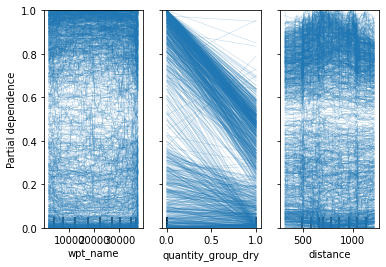

In [67]:
plot_partial_dependence(rf_clf, X_train, partial_dependence_cols, kind='individual',target=0) 

In [68]:
XGBoost_multi_class(x_train=X_train, y_train=y_train, x_test=X_validation, y_test=y_validation, test_set_values=X_test, test_users = X_test_users)


[XGBoost]
          id    status_group
0      50785      functional
1      51630      functional
2      17168      functional
3      45559  non functional
4      49871      functional
...      ...             ...
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional

[14850 rows x 2 columns]
Accuracy: 0.770034
Precision: 0.770034
Recall: 0.770034
F1 score: 0.770034


[0.7700336700336701,
 0.7700336700336701,
 0.7700336700336701,
 0.7700336700336701]

In [69]:
nb(x_train=X_train, y_train=y_train, x_test=X_validation, y_test=y_validation, test_set_values=X_test, test_users = X_test_users)


[Naive Bayes]
Accuracy: 0.613131


0.6131313131313131

In [70]:
# svm(x_train=X_train, y_train=y_train, x_test=X_validation, y_test=y_validation, test_set_values=X_test, test_users = X_test_users)